In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [114]:
btc_1h = pd.read_csv ('./btc_1h.csv', encoding='unicode_escape')

In [115]:
btc_1h['time'] = btc_1h['time'].str.extract('(\d{4}-\d{2}-\d{2}\w\d{2}:\d{2}:\d{2})', expand=True)
btc_1h['time'] = pd.to_datetime(btc_1h["time"])
btc_1h.set_index("time", inplace = True)
#btc_5 = btc_5.reindex(pd.date_range(start=btc_5.index.min(), end=btc_5.index.max(), freq='5m'))

In [116]:
btc_1h.head()

,close,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 3,Lower ATR 3,RSI Stoch,RSI
time,,,,,,,,,,
2022-08-09 00:00:00,23805.5,23914.99075,23814.05140,23675.83031,23522.51723,23362.78094,24322.01040,23306.09240,8.541333,52.873148
2022-08-09 01:00:00,23809.5,23891.54836,23813.63763,23683.46858,23532.76662,23371.62687,24321.63528,23305.63999,0.222109,53.055619
2022-08-09 02:00:00,23784.0,23867.64873,23810.94330,23689.21323,23541.73924,23379.79267,24310.72683,23311.15978,0.222109,51.681810
2022-08-09 03:00:00,23731.5,23837.39345,23803.72119,23691.62962,23548.51641,23386.75717,24294.05589,23313.38648,0.222109,48.875778
2022-08-09 04:00:00,23799.5,23828.97269,23803.33744,23697.79364,23557.48011,23394.93030,24297.64824,23309.02665,4.163851,52.475020


In [124]:
def buySell_RSI(btc_1h):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(btc_1h)):
    if (btc_1h ['RSI'][i] < 20):
      if flag != 1:
        sigPriceBuy.append(btc_1h['close'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif (btc_1h['RSI'][i] > 65):
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(btc_1h['close'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)

In [125]:
buySell_RSI = buySell_RSI(btc_1h)
btc_1h['Buy Signal Price RSI'] = buySell_RSI[0]
btc_1h['Sell Signal Price RSI'] = buySell_RSI[1]
# To show the data
btc_1h.head()

,close,EMA 1,EMA 2,EMA 3,EMA 4,EMA 5,Upper ATR 3,Lower ATR 3,RSI Stoch,RSI,Buy Signal Price RSI,Sell Signal Price RSI
time,,,,,,,,,,,,
2022-08-09 00:00:00,23805.5,23914.99075,23814.05140,23675.83031,23522.51723,23362.78094,24322.01040,23306.09240,8.541333,52.873148,NaN,NaN
2022-08-09 01:00:00,23809.5,23891.54836,23813.63763,23683.46858,23532.76662,23371.62687,24321.63528,23305.63999,0.222109,53.055619,NaN,NaN
2022-08-09 02:00:00,23784.0,23867.64873,23810.94330,23689.21323,23541.73924,23379.79267,24310.72683,23311.15978,0.222109,51.681810,NaN,NaN
2022-08-09 03:00:00,23731.5,23837.39345,23803.72119,23691.62962,23548.51641,23386.75717,24294.05589,23313.38648,0.222109,48.875778,NaN,NaN
2022-08-09 04:00:00,23799.5,23828.97269,23803.33744,23697.79364,23557.48011,23394.93030,24297.64824,23309.02665,4.163851,52.475020,NaN,NaN


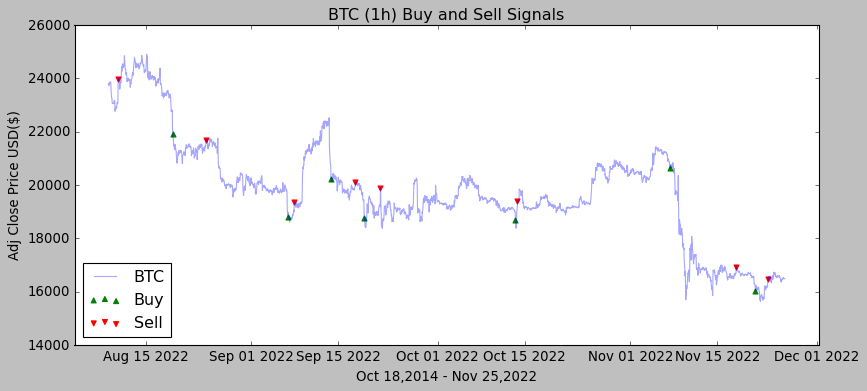

In [127]:
plt.style.use('classic')
plt.figure(figsize=(12,5))
plt.plot(btc_1h['close'], label='BTC', alpha=0.35)
plt.plot(btc_1h['Buy Signal Price RSI'], label='', alpha=0.35)
plt.plot(btc_1h['Sell Signal Price RSI'],label='', alpha=0.35)
plt.scatter(btc_1h.index, btc_1h['Buy Signal Price RSI'], label ='Buy', marker='^',color='green')
plt.scatter(btc_1h.index, btc_1h['Sell Signal Price RSI'],label='Sell', marker='v', color='red')
plt.title('BTC (1h) Buy and Sell Signals')
plt.xlabel("Oct 18,2014 - Nov 25,2022")
plt.ylabel("Adj Close Price USD($)")
plt.legend(loc='lower left')
plt.show()